Fitting of Periodic Data
a)	Create a function that simulates data that takes a periodic function with a form: 
v = a0 + a1t + a2 sin(a4t) + a3 cos(a4t)
You should simulate data at a number of random times over an interval and include Gaussian errors for the data. 
The inputs ai should take the form of a 1-dimensional python array.

In [123]:
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt

def periodic_function(t, a):
    return a[0] + a[1] * np.array(t) + a[2] * np.sin(a[4] * np.array(t)) + a[3] * np.cos(a[4] * np.array(t))

def fit_function_a(t, a0, a1, a2, a3, a4):
    return a0 + a1 * np.array(t) + a2 * np.sin(a4 * np.array(t)) + a3 * np.cos(a4 * np.array(t))


b)	Setting a0=0, a1=1, a2=1, a3=1 and a4=0, simulate a dataset from times t=20 to t = 35, containing 100 points with Gaussian errors with uncertainty 0.5 

Text(0.5, 1.0, 'Periodic data')

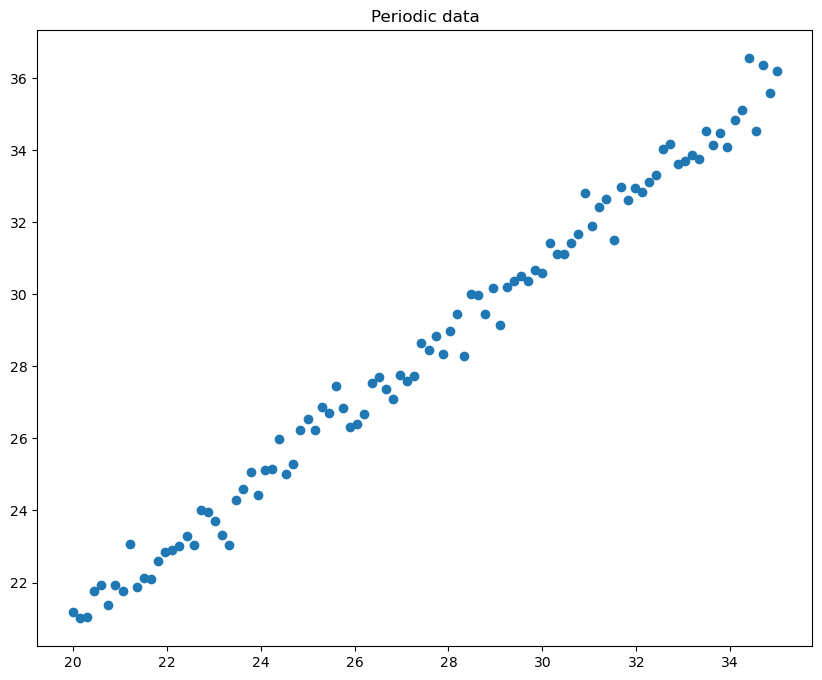

In [124]:
t_low = 20
t_high = 35
n_pts = 100
a = [0, 1, 1, 1, 0]

xi = np.linspace(t_low,t_high,n_pts)
y_random = stats.norm.rvs(size=n_pts,loc=0,scale=0.5)

yi = periodic_function(xi, a) + y_random

fig, ax = plt.subplots(figsize=(10, 8))
plt.plot(xi, yi, "o")
plt.title("Periodic data")

c)	 Fit the data with a function of the same form as above.  Do the fit parameters agree, within error, with the expected values?

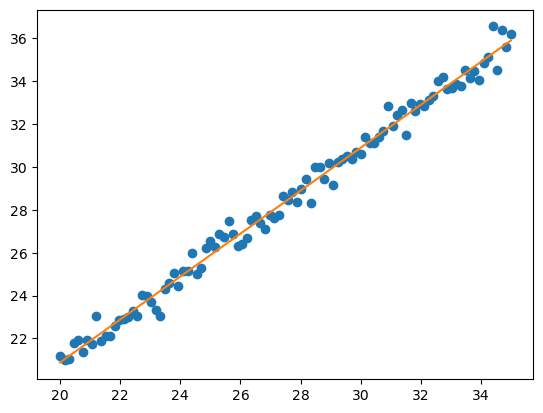

In [125]:
from scipy.optimize import curve_fit

popt, pcov = curve_fit(fit_function_a, xi, yi, p0=[0, 1, 1, 1, 0])
perr = np.sqrt(np.diag(pcov))

fit_a_x = xi
fit_a_y = fit_function_a(fit_a_x, *popt)

plt.plot(xi, yi, "o")
plt.plot(fit_a_x, fit_a_y)

d)	Now, define a NEW fitting function (for the same data) as
        v=a0 + a1t + a2 sin(a3t + a4)
	and refit the data and extract the fit parameters, with errors.   
	Does this give better or worse fit?  
	Extra Credit:  Show that the two fits are mathematically equivalent, and then from this calculate the mathematical relationship between the fit parameters and errors of the two fit functions.


[-2.31896905e-02  1.00175841e+00  1.62849313e+00  8.64516980e-01
  1.07435644e-05] [0.8413266  1.00177563 0.         0.         0.        ]
[[ 1.33780771e+11 -2.46286435e+06  1.06332059e+10 -1.33781094e+11
   1.89272701e+06]
 [-2.46286435e+06  2.60775600e+03  2.60459505e+07  2.46284713e+06
  -6.57906418e+02]
 [ 1.06332059e+10  2.60459505e+07  3.45440730e+11 -1.06333779e+10
  -3.47645984e+06]
 [-1.33781094e+11  2.46284713e+06 -1.06333779e+10  1.33781418e+11
  -1.89272265e+06]
 [ 1.89272701e+06 -6.57906418e+02 -3.47645984e+06 -1.89272265e+06
   2.78257779e+02]] [[inf inf inf inf inf]
 [inf inf inf inf inf]
 [inf inf inf inf inf]
 [inf inf inf inf inf]
 [inf inf inf inf inf]]
[3.65760537e+05 5.10661924e+01 5.87742061e+05 3.65761422e+05
 1.66810605e+01] [inf inf inf inf inf]


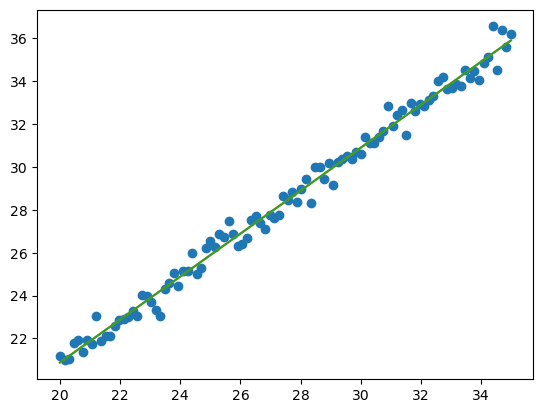

In [126]:
def fit_function_d(t, a0, a1, a2, a3, a4):
    return a0 + a1 * np.array(t) + a2 * np.sin(a3 * np.array(t) + a4)

popt_d, pcov_d = curve_fit(fit_function_d, xi, yi, p0=[0, 0, 0, 0, 0])
perr_d = np.sqrt(np.diag(pcov_d))

fit_d_x = xi
fit_d_y = fit_function_a(fit_d_x, *popt_d)

print(popt, popt_d)
print(pcov, pcov_d)
print(perr, perr_d)

plt.plot(xi, yi, "o")
plt.plot(fit_a_x, fit_a_y)
plt.plot(fit_d_x, fit_d_y)

Periodic function from part b:
a0 = -2.31896905e-02  
a1 = 1.00175841e+00  
a2 = 1.62849313e+00  
a3 = 8.64516980e-01
a4 = 1.07435644e-05
v = a0 + a1t + a2 sin(a4t) + a3 cos(a4t)
v = a0 + a1t + a2 sin(~0) + a3 cos(~0)
v = ~0 + ~t + ~0 + ~1
v = ~t + ~1

Periodic function from part d:
a0 = 0.8413266
a1 = 1.00177563
a2 = 0
a3 = 0
a4 = 0
v = a0 + a1t + a2 sin(a3t + a4)
v = a0 + a1t + 0 sin(0t + 0)
v = ~1 + ~1*t + 0
v = ~1 + ~t